In [1]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tqdm import tqdm, trange
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import precision_score
from matplotlib.pyplot import figure
from decimal import *

In [2]:
def concatenate_Frames(frames, timeframe):
    df = pd.DataFrame()
    for frame_name in frames:
        frame = pd.read_csv(frame_name)
        frame = pd.DataFrame(frame["close"])
        frame = frame[-timeframe:]
        frame.reset_index(inplace=True)
        frame = frame["close"]
        df[f"{frame_name[:-4]}"] = frame
    return df

In [5]:
frame = concatenate_Frames(["AAPL.csv", "GCI.csv"], 1000)
frame

,AAPL,GCI
0,77.4075,5.94
1,77.5825,5.81
2,79.2400,6.06
3,78.1700,6.17
4,77.8350,6.82
...,...,...
995,194.6800,2.62
996,193.6000,2.59
997,193.0500,2.48
998,193.1500,2.46


In [36]:
pd.DataFrame(frame.iloc[900:1100, 1]).min()

GCI    1.83
dtype: float64

In [41]:
def find_LO(df):
    Tickers = df.columns.values.tolist()
    list_lo = []
    for stock_number in range(len(Tickers)):
        name = Tickers[stock_number]  
        for day in range(len(df.index)):
            list_lo.append((pd.DataFrame(df.iloc[day:day + 280, stock_number])).median(skipna=True))
        #df[f"LO {name}"] = list_lo
    return list_lo
find_LO(frame)


/var/folders/y7/q3m4z5nn3xz3qjh1fqwvrpvh0000gn/T/ipykernel_28811/1841596136.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  list_lo.append((pd.DataFrame(df.iloc[day:day + 280, stock_number])).median(skipna=True))
/var/folders/y7/q3m4z5nn3xz3qjh1fqwvrpvh0000gn/T/ipykernel_28811/1841596136.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  list_lo.append((pd.DataFrame(df.iloc[day:day + 280, stock_number])).median(skipna=True))
/var/folders/y7/q3m4z5nn3xz3qjh1fqwvrpvh0000gn/T/ipykernel_28811/1841596136.py:7: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  list_lo.append((pd.DataFrame(df.iloc[day:day + 280, stock_number])).median(skipna=True))
/var/folders/y7/q3m4z5nn3xz3qjh1fqwvrpvh0000gn/T/ipy

[AAPL    98.04125
 dtype: float64,
 AAPL    102.30875
 dtype: float64,
 AAPL    106.55
 dtype: float64,
 AAPL    106.98
 dtype: float64,
 AAPL    107.67
 dtype: float64,
 AAPL    108.495
 dtype: float64,
 AAPL    108.815
 dtype: float64,
 AAPL    108.89875
 dtype: float64,
 AAPL    109.15625
 dtype: float64,
 AAPL    109.52
 dtype: float64,
 AAPL    109.86375
 dtype: float64,
 AAPL    110.07125
 dtype: float64,
 AAPL    110.21
 dtype: float64,
 AAPL    110.39
 dtype: float64,
 AAPL    110.77625
 dtype: float64,
 AAPL    111.15625
 dtype: float64,
 AAPL    111.505
 dtype: float64,
 AAPL    111.905
 dtype: float64,
 AAPL    112.065
 dtype: float64,
 AAPL    112.205
 dtype: float64,
 AAPL    112.50375
 dtype: float64,
 AAPL    112.77375
 dtype: float64,
 AAPL    112.915
 dtype: float64,
 AAPL    113.015
 dtype: float64,
 AAPL    113.09
 dtype: float64,
 AAPL    113.325
 dtype: float64,
 AAPL    113.67
 dtype: float64,
 AAPL    113.87625
 dtype: float64,
 AAPL    113.99625
 dtype: float64,

In [217]:
def BackTest(df):   
    Tickers = df.columns.values.tolist()
    close_data = df
    pos_size = 1
    figure(figsize=(20, 15), dpi=80)
    close_data.plot()
    plt.title("Buys and Sells")
    portfolio_trades = [[], []]
    portfolio_Balance = 0.0
    portfolio_Balance_OT = []
    positions_list  = []
    profit_and_loss = 0
    profit_and_loss_graph = []
    unrealised_pnl = 0.0 
    for i in range(len(Tickers)):
        positions_list.append(0)


    for day in range(5, len(close_data.index)):
        for stock_number in range(len(Tickers)):
               #positive = go up
                if ((close_data.iloc[day -1,stock_number] - close_data.iloc[day, stock_number])/close_data.iloc[day -1, stock_number] < -0.01 and (portfolio_Balance < (700.00 + close_data.iloc[day, stock_number]))) :
                        plt.axvline(close_data.index[day], color='blue',linestyle='dashed') 
                        portfolio_trades[stock_number].append(close_data.iloc[day, stock_number])
                        #print(f"added balance: {portfolio_Balance } + {close_data.iloc[day, stock_number]}")
                        portfolio_Balance = portfolio_Balance + close_data.iloc[day, stock_number]
                        portfolio_Balance_OT.append(portfolio_Balance)    
                        portfolio_Balance_OT.append(portfolio_Balance)
                        positions_list[stock_number] = positions_list[stock_number] + pos_size
                        print(f"bought {Tickers[stock_number]} at {close_data.iloc[day, stock_number]}, Balance: {portfolio_Balance}")
                        
                        
                elif ((close_data.iloc[day -1, stock_number] - close_data.iloc[day, stock_number])/close_data.iloc[day -1, stock_number] > 0.01 and positions_list[stock_number] >= pos_size):
                        plt.axvline(close_data.index[day], color='red',linestyle='dashed')
                        positions_list[stock_number] = positions_list[stock_number] - pos_size
                        bought_at = portfolio_trades[stock_number].pop(0)
                        profit_and_loss = profit_and_loss + (close_data.iloc[day, stock_number] - bought_at)
                        portfolio_Balance = portfolio_Balance - close_data.iloc[day, stock_number]
                        print(f"Sold {Tickers[stock_number]} at {close_data.iloc[day, stock_number]} and was bought at {bought_at} with profit: {close_data.iloc[day, stock_number]-bought_at}, balance: {portfolio_Balance}")
                        profit_and_loss_graph.append(profit_and_loss)
                        
                    
                    
                 
    for stock_number in range(len(Tickers)):
        for trade in portfolio_trades[stock_number]:
            unrealised_pnl = unrealised_pnl + (close_data.iloc[-1, stock_number] - trade)
            print(f"Stock: {Tickers[stock_number]}, bought for: {trade}, currently: {close_data.iloc[-1, stock_number]}")
            
    portfolio_Balance_OT_Frame = pd.DataFrame(portfolio_Balance_OT)
    portfolio_Balance_OT_Frame.plot()
    plt.title("Portfolio Balance")
    profit_and_loss_graph_Frame = pd.DataFrame(profit_and_loss_graph)
    profit_and_loss_graph_Frame.plot()
    plt.title("P&L")
    print(f"Position:  {positions_list}")
    print(f"Realised P&L:  {profit_and_loss}")
    print(f"Unrealised P&L:  {unrealised_pnl}")

In [201]:
df = pd.read_csv("rev5.csv")
df.set_index("Ticker", inplace = True)
df.dropna(inplace=True)
df


,Description,Total Revenue (FY),Gross Profit (FY),Net Income (FY),Industry
Ticker,,,,,
QBIO,Q BioMed Inc.,284352.0,-8988.0,-2052093.0,Pharmaceuticals: Major
HCMC,Healthier Choices Management Corp.,29267003.0,9162603.0,-7217611.0,Food Retail
ZAAG,ZA Group Inc.,153915.0,-493141.0,-4551815.0,Investment Managers
CBDL,CBD Life Sciences Inc.,160241.0,-280260.0,-859804.0,Pharmaceuticals: Other
MMMM,Quad M Solutions Inc.,54892679.0,2193340.0,-4212053.0,Other Metals/Minerals
...,...,...,...,...,...
BLTHD,American Battery Materials Inc.,0.0,0.0,-1486848.0,Chemicals: Agricultural
IRNTQ,IRONNET INC,27257000.0,13263000.0,-111010000.0,Information Technology Services
HENC,Hero Technologies Inc.,0.0,-1984.0,-541583.0,Agricultural Commodities/Milling


bought AAPL at 78.81, Balance: 78.81
bought GCI at 6.99, Balance: 85.8
bought AAPL at 79.6825, Balance: 165.48250000000002
Sold GCI at 6.65 and was bought at 6.99 with profit: -0.33999999999999986, balance: 158.8325
Sold AAPL at 77.2375 and was bought at 78.81 with profit: -1.5725000000000051, balance: 81.59500000000001
bought AAPL at 79.4225, Balance: 161.0175
bought GCI at 6.46, Balance: 167.47750000000002
bought AAPL at 81.085, Balance: 248.5625
Sold GCI at 6.34 and was bought at 6.46 with profit: -0.1200000000000001, balance: 242.2225
Sold AAPL at 77.3775 and was bought at 79.6825 with profit: -2.305000000000007, balance: 164.845
bought AAPL at 79.7125, Balance: 244.5575
bought GCI at 6.26, Balance: 250.8175
bought GCI at 6.49, Balance: 257.3075
bought AAPL at 81.3025, Balance: 338.61
Sold AAPL at 80.0075 and was bought at 79.4225 with profit: 0.5849999999999937, balance: 258.6025
Sold GCI at 6.25 and was bought at 6.26 with profit: -0.009999999999999787, balance: 252.3525000000000

<Figure size 1600x1200 with 0 Axes>

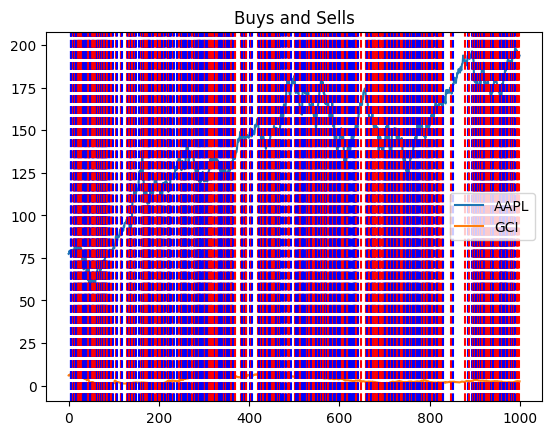

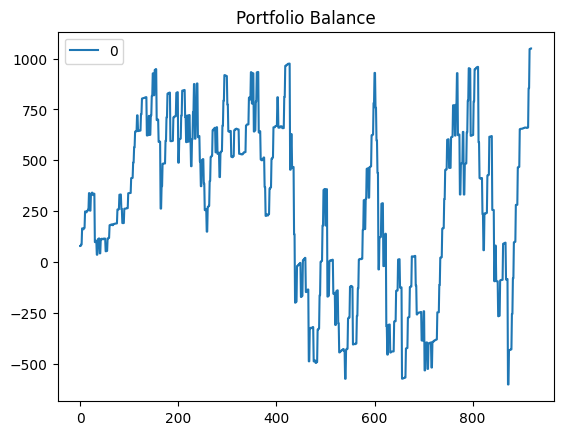

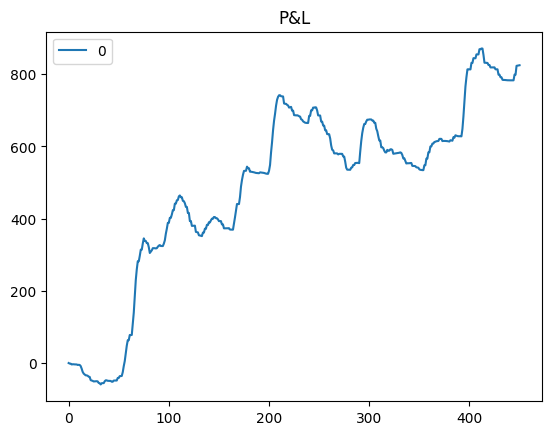

In [218]:
frame = concatenate_Frames(["AAPL.csv", "GCI.csv"], 1000)
BackTest(frame)